<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi, Spencer! I am a reviewer on this project. I am very glad to see you on this sprint! 
    

Before we start, I want to pay your attention to the color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ✔️</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ⚠️</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ❌</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content, however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review. 
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> thank you very much for submitting the project! This topic is hard, but everything is very good in your project. You successfully compared several models, which is great! However, there are a couple of issues that need your attention. Would you take a look at my comments?
    
    
    
    

</div>

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Good introduction! 
    
</div>

## Initialization

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
It's a quite useful module, well done.   
</div>

## Load Data

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

all types look correct

In [7]:
df_reviews.duplicated().sum()

0

there are no duplicates

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Yes, it is very imporant to check data for the duplicates. Very good! 
    

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

You can also check for the tricky duplicates, such as `'review' - 'pos' - 'ds_part'` duplicates.  
    
  
</div>

In [8]:
missing_values = df_reviews.isnull().sum()
missing_values_summary = pd.DataFrame({
    'missing_values': missing_values,
})


missing_values_summary

,missing_values
tconst,0
title_type,0
primary_title,0
original_title,0
start_year,0
end_year,0
runtime_minutes,0
is_adult,0
genres,0
average_rating,2


there are two missing values in average rating and votes

dropping the rows with the missing values

In [9]:
rows_with_missing_values = df_reviews[df_reviews.isnull().any(axis=1)]
rows_with_missing_values

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
22280,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"This is a truly great film, with excellent dir...",9,pos,1,test,3231
22281,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,<NA>,"A film is beyond all expectations, an excellen...",10,pos,1,test,3232


In [10]:
df_reviews = df_reviews.dropna()

In [11]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47329 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47329 non-null  object 
 1   title_type       47329 non-null  object 
 2   primary_title    47329 non-null  object 
 3   original_title   47329 non-null  object 
 4   start_year       47329 non-null  int64  
 5   end_year         47329 non-null  object 
 6   runtime_minutes  47329 non-null  object 
 7   is_adult         47329 non-null  int64  
 8   genres           47329 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47329 non-null  object 
 12  rating           47329 non-null  int64  
 13  sp               47329 non-null  object 
 14  pos              47329 non-null  int64  
 15  ds_part          47329 non-null  object 
 16  idx              47329 non-null  int64  
dtypes: Int64(1),

In [12]:
df_reviews.describe()

,start_year,is_adult,average_rating,votes,rating,pos,idx
count,47329.000000,47329.000000,47329.000000,4.732900e+04,47329.000000,47329.000000,47329.000000
mean,1989.630882,0.001733,5.998278,2.556292e+04,5.484439,0.498933,6279.826808
std,19.600702,0.041588,1.494289,8.367004e+04,3.473083,0.500004,3605.724280
min,1894.000000,0.000000,1.400000,9.000000e+00,1.000000,0.000000,0.000000
25%,1982.000000,0.000000,5.100000,8.270000e+02,2.000000,0.000000,3162.000000
50%,1998.000000,0.000000,6.300000,3.197000e+03,4.000000,0.000000,6300.000000
75%,2004.000000,0.000000,7.100000,1.397400e+04,9.000000,1.000000,9412.000000
max,2010.000000,1.000000,9.700000,1.739448e+06,10.000000,1.000000,12499.000000


ready for eda

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Agreed! 
</div>

## EDA

Let's check the number of movies and reviews over years.

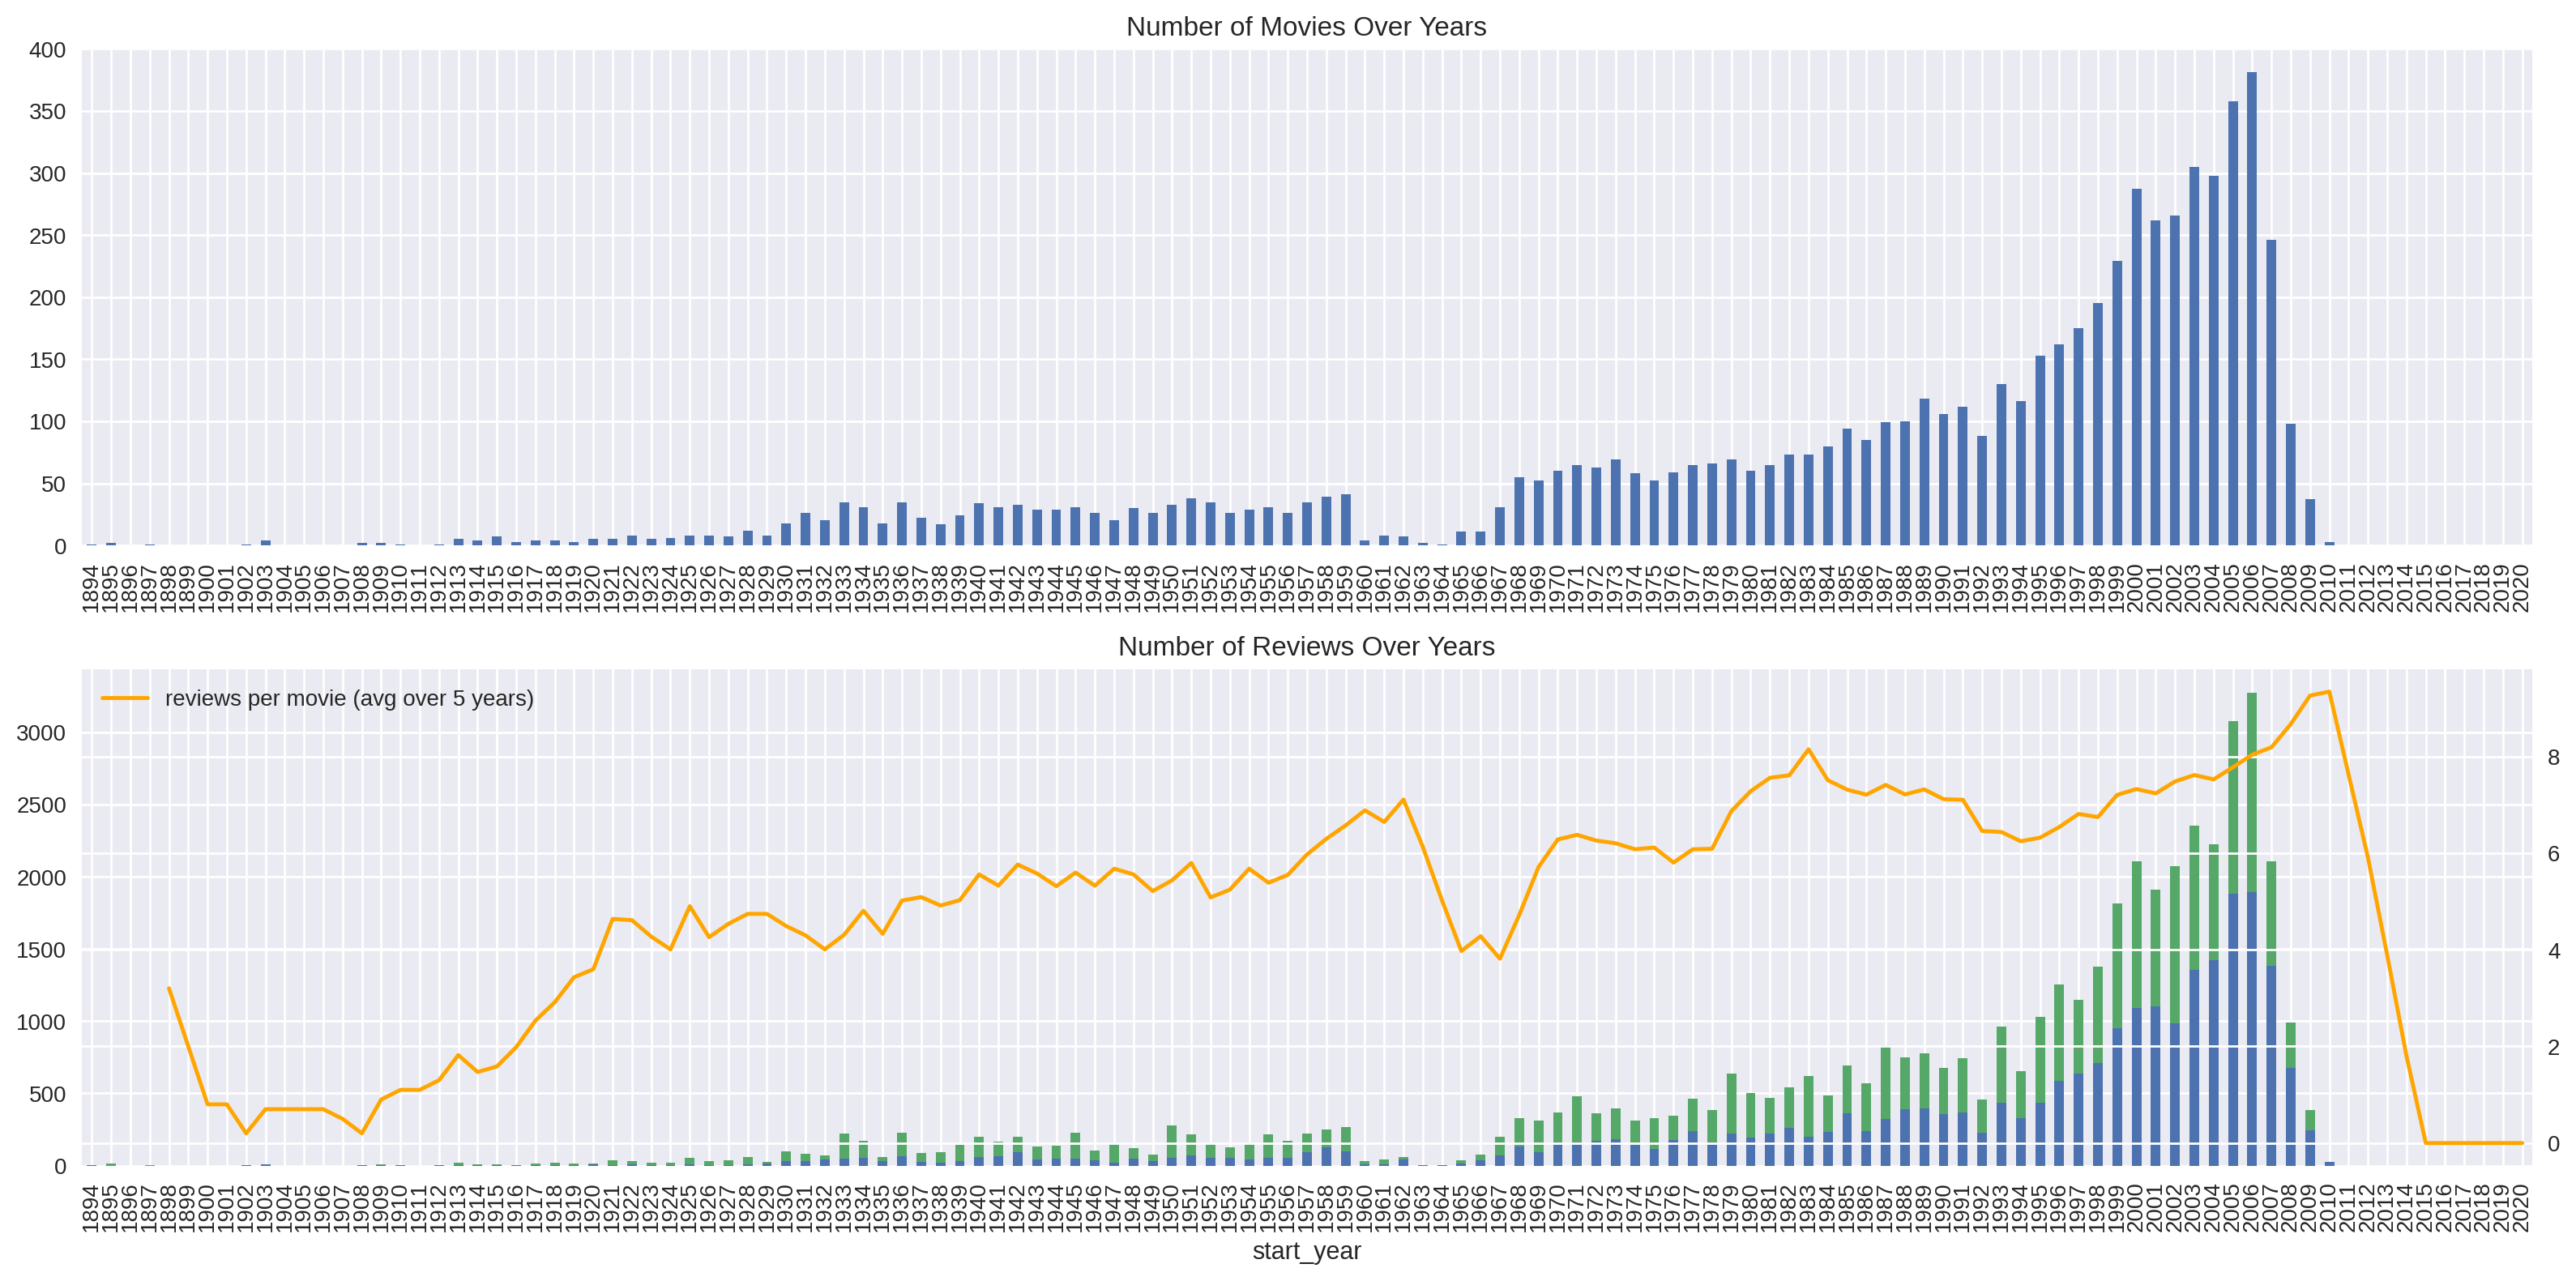

In [13]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

the number of movies and the number of reviews increase throughout the years. it really starts seeing an increase from the 1980's onwards. positive and negative reviews seem close in numbers

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Nice charts!     

</div>

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

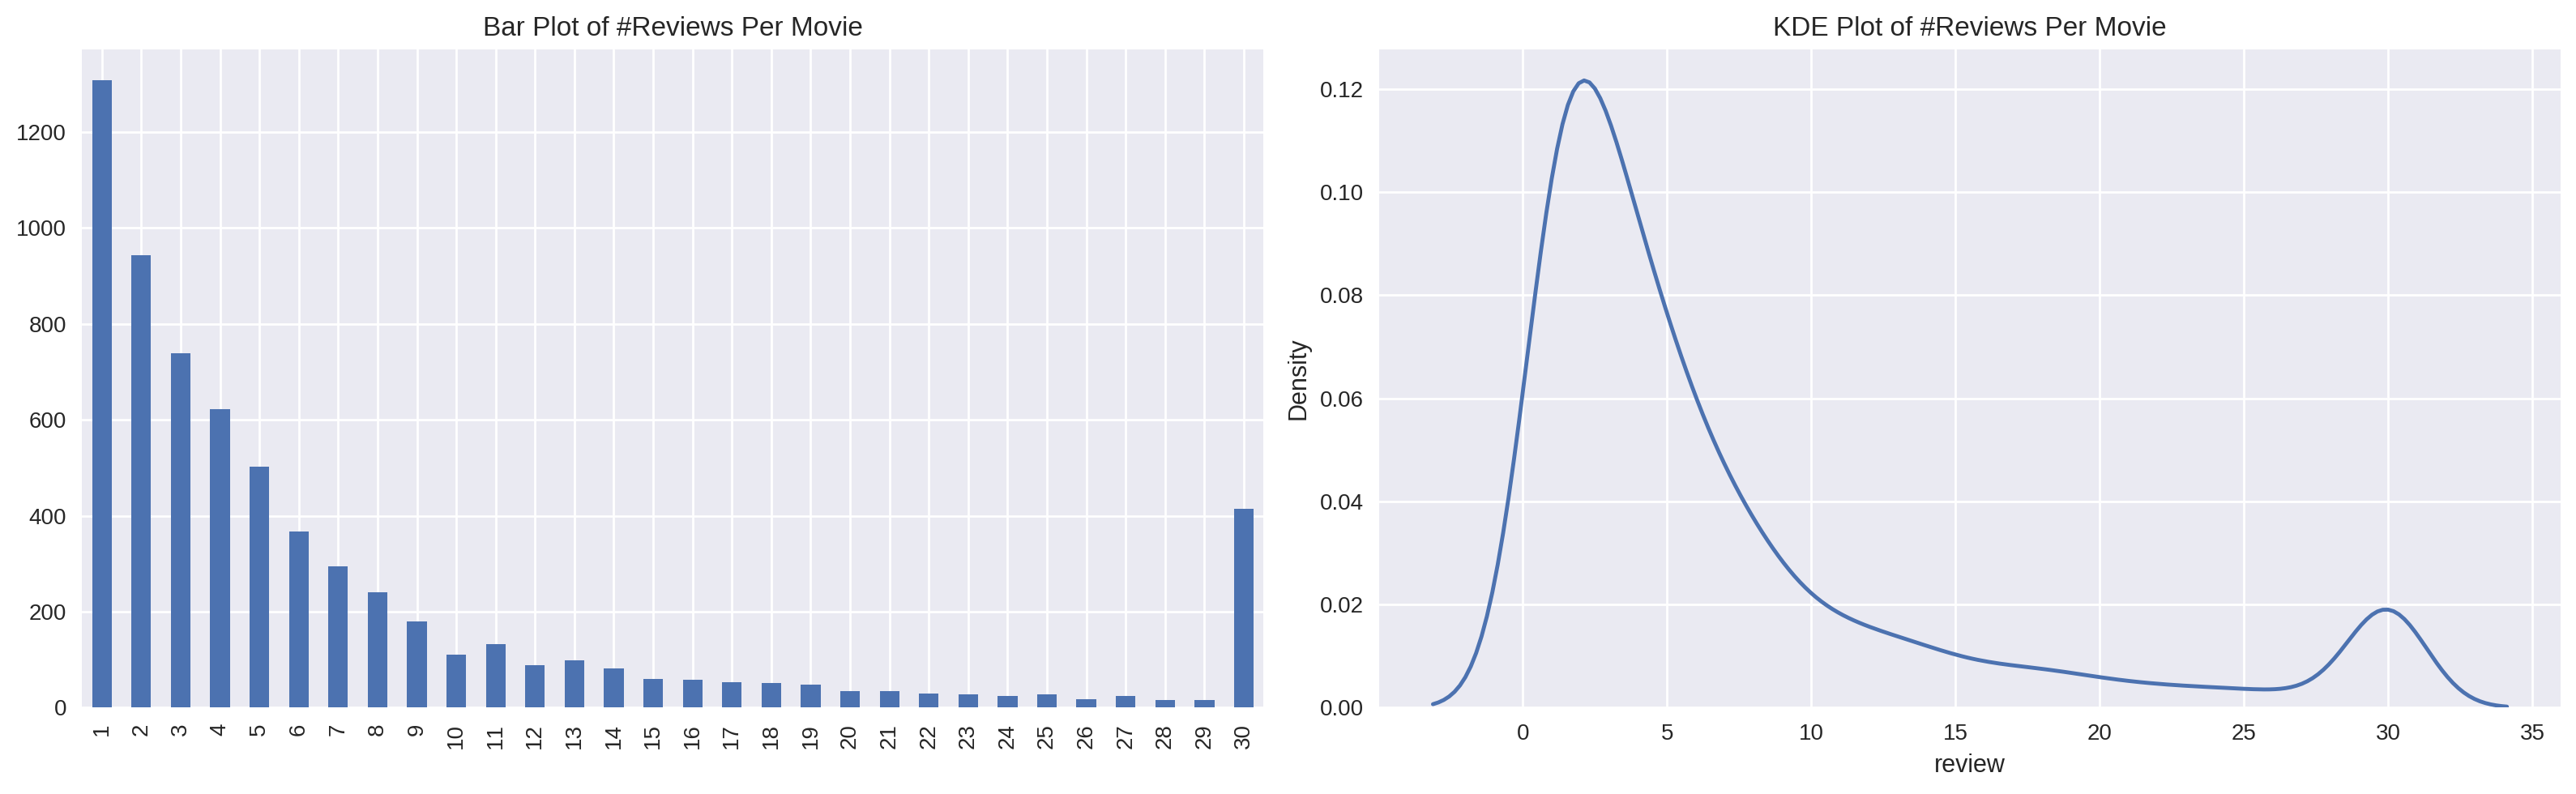

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

most movies didnt receive many reviews. but there are a few movies with a lot of reviews. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Correct.
</div>

In [15]:
df_reviews['pos'].value_counts()

0    23715
1    23614
Name: pos, dtype: int64

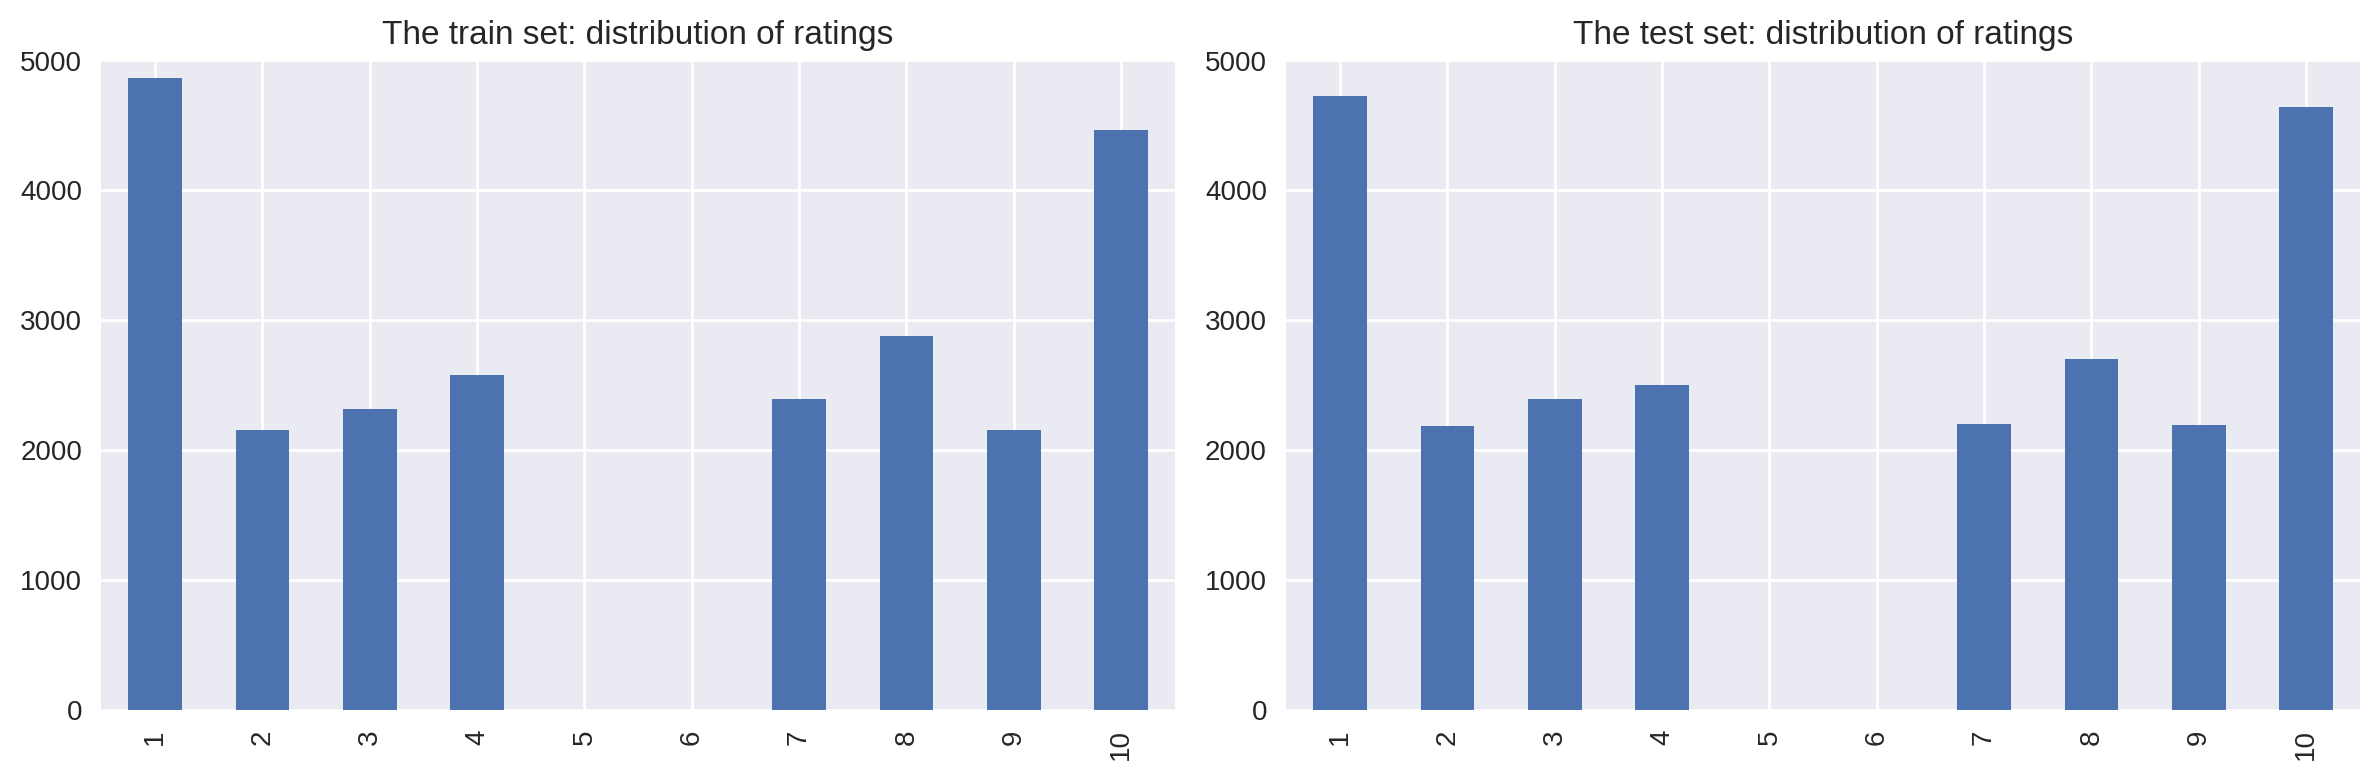

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

both the train set and the test set have a similar distribution of ratings between them indicating that the split kept its distribution even

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
Good. </div>

Distribution of negative and positive reviews over the years for two parts of the dataset

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


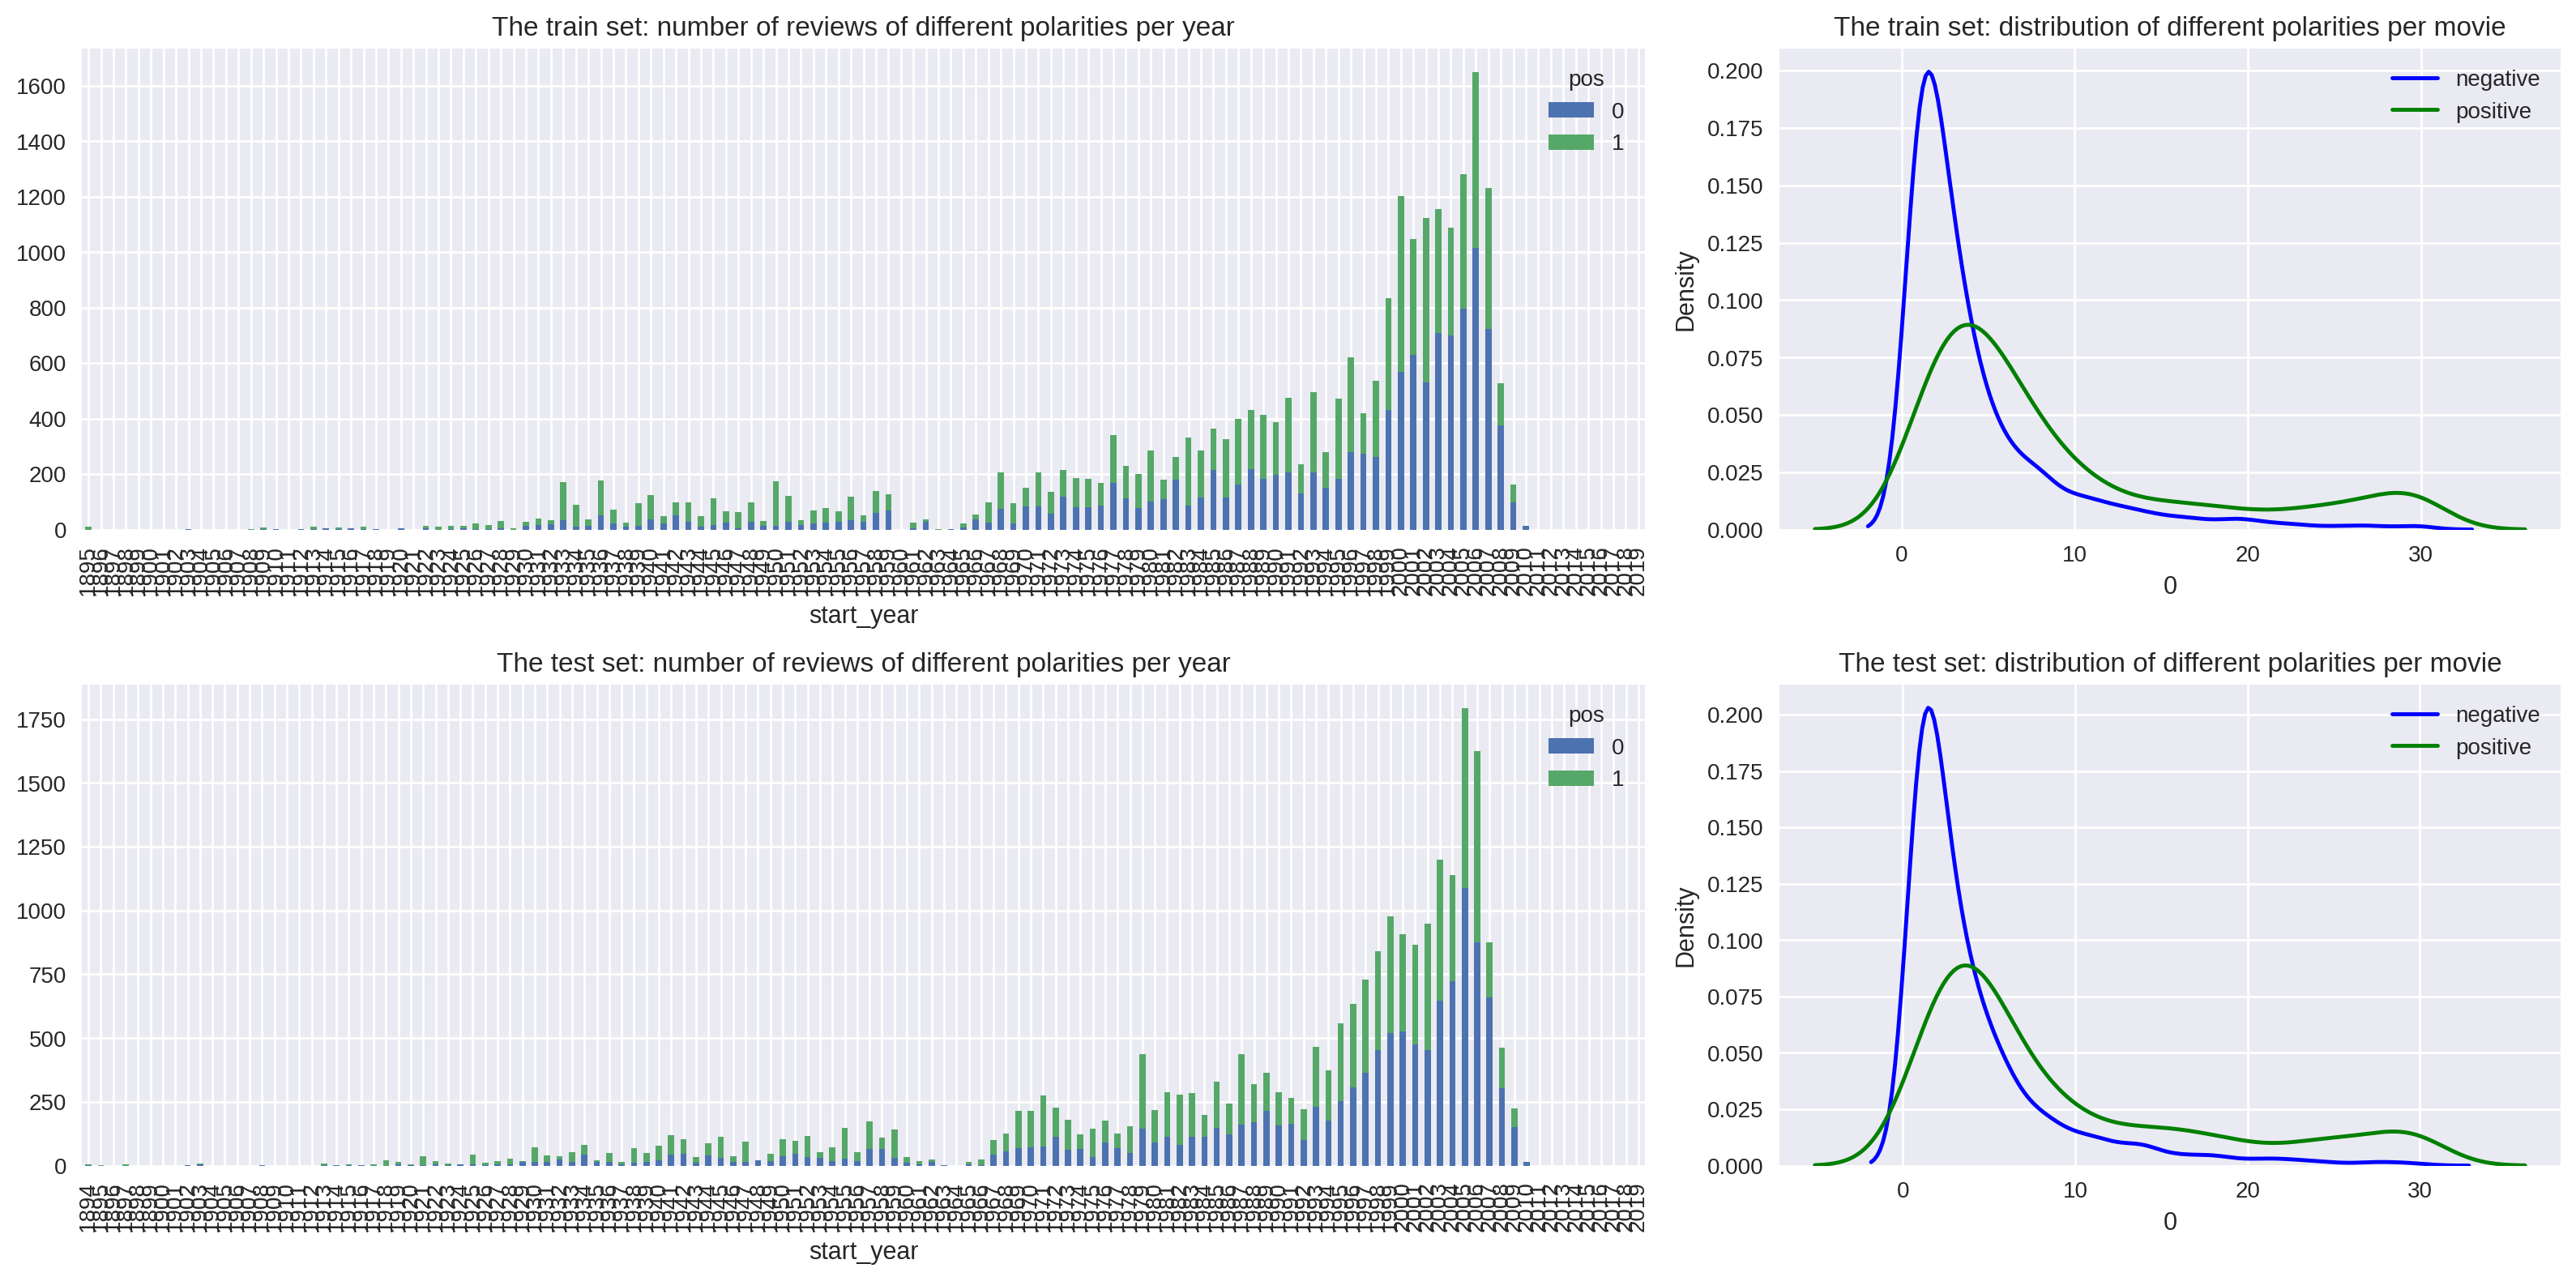

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

both the train set and  the test set have similar graphs further indicating that the split kept the distribution even. there are a few years where the negative reviews highly outweighed the positive reviews. but for the most part, the postive reviews outweighed the negative reviews. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Very good charts! 
    
</div>


## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [18]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

- According to [PEP8](https://peps.python.org/pep-0008/), we should always put imports at the top of the file.   


- Notice that **type** veriable is green in the function above. When you see that your variables are green, you should think of another name, since green color indicates that this name is reserved in python. 
</div>

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [19]:
import re
tqdm.pandas()

In [20]:
def normalize_review(review):    
    review = review.lower()
    review = re.sub(r'[\d\W]+', ' ', review)
    review = re.sub(r'\s+', ' ', review).strip()
    return review



<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Nice code!     
</div>

In [21]:
df_reviews_cleaned = df_reviews.copy()

df_reviews_cleaned['review_norm'] = df_reviews_cleaned['review'].progress_apply(normalize_review)

# Display the first few rows to confirm the normalization
print(df_reviews_cleaned[['review', 'review_norm']].head())

  0%|          | 0/47329 [00:00<?, ?it/s]

                                              review  \
0  The pakage implies that Warren Beatty and Gold...   
1  How the hell did they get this made?! Presenti...   
2  There is no real story the film seems more lik...   
3  Um .... a serious film about troubled teens in...   
4  I'm totally agree with GarryJohal from Singapo...   

                                         review_norm  
0  the pakage implies that warren beatty and gold...  
1  how the hell did they get this made presenting...  
2  there is no real story the film seems more lik...  
3  um a serious film about troubled teens in sing...  
4  i m totally agree with garryjohal from singapo...  


## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [22]:
df_reviews_train = df_reviews_cleaned.query('ds_part == "train"').copy()
df_reviews_test = df_reviews_cleaned.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23533, 18)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment  </h2>
    
Correct. 

</div>

## Working with models

### Model 0 - Constant

In [23]:
from sklearn.dummy import DummyClassifier

In [24]:
train_features = df_reviews_train['review_norm']
test_features = df_reviews_test['review_norm']

          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


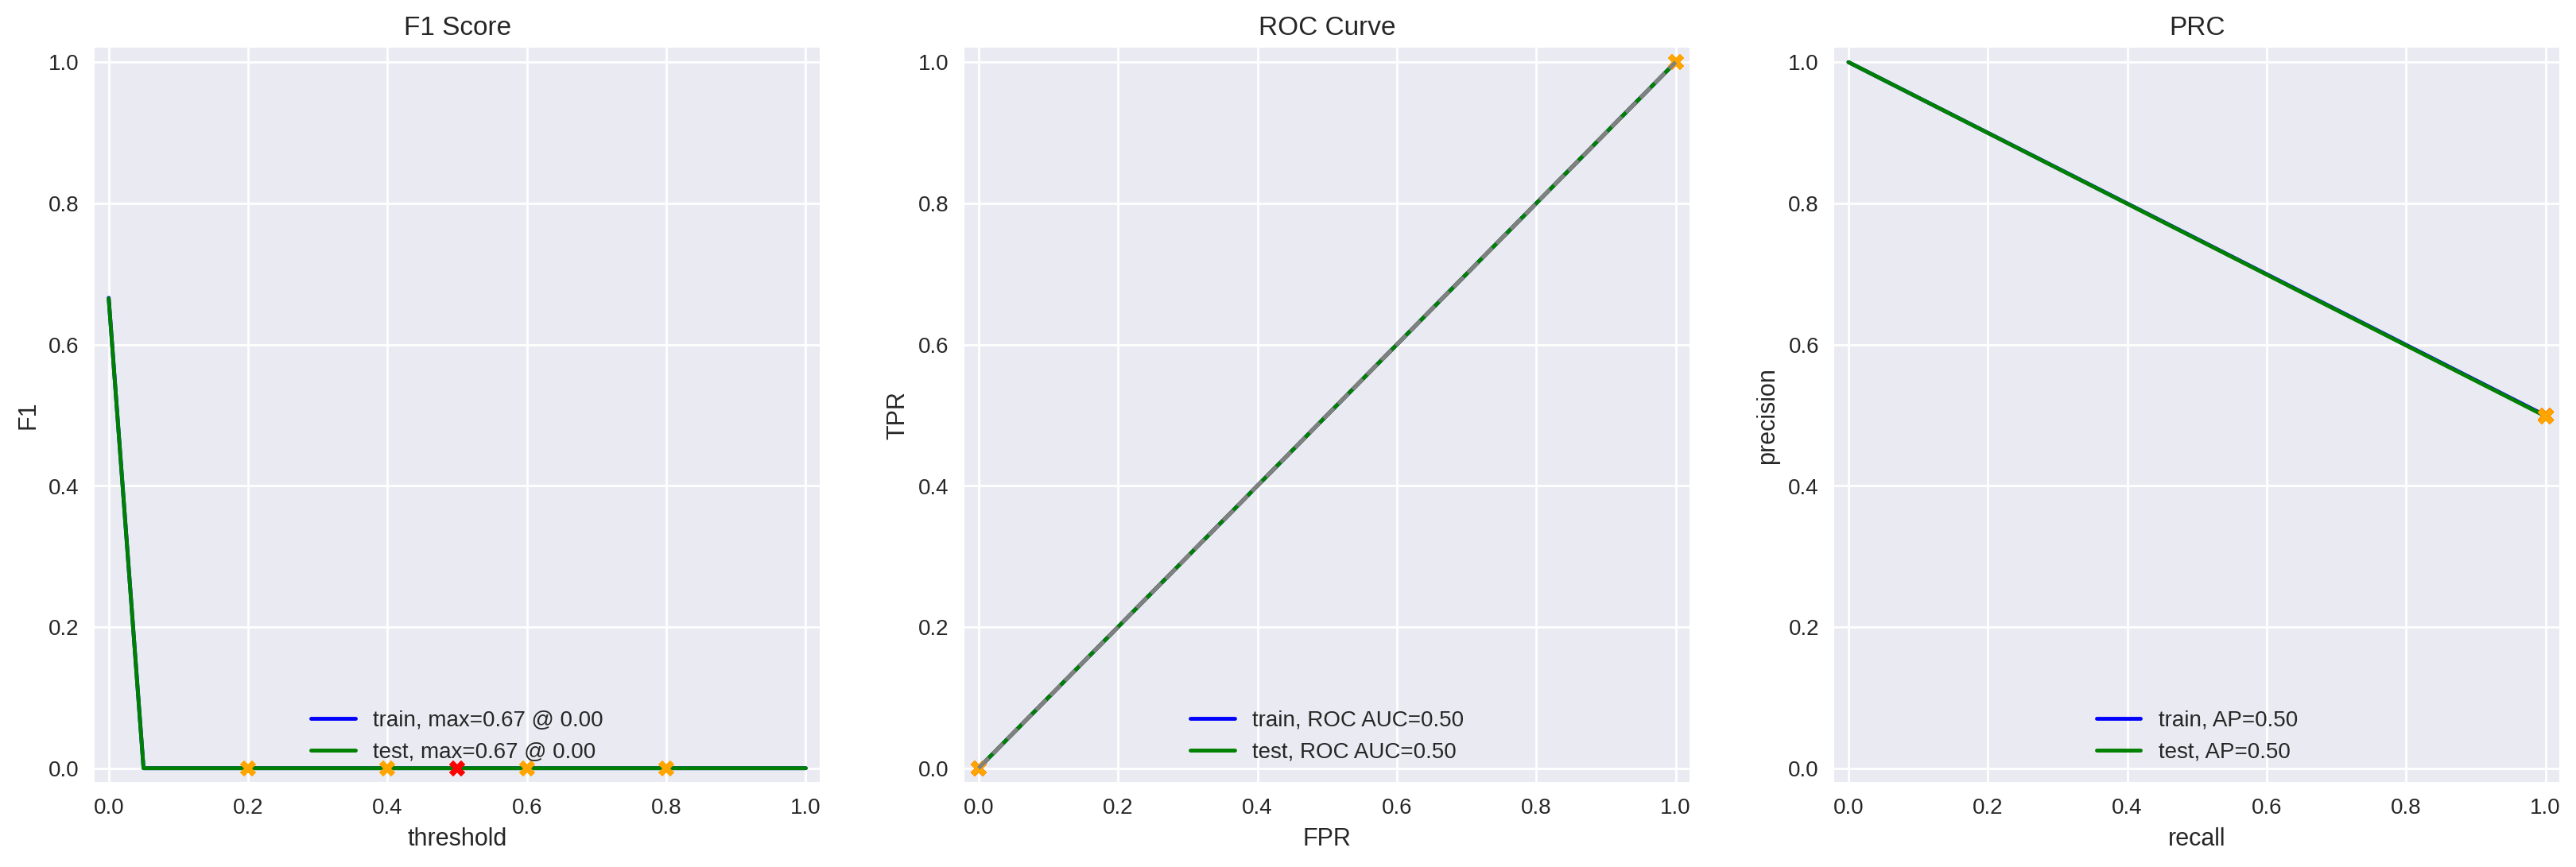

In [25]:
dummy_train_features = [[0]] * len(train_features)
dummy_test_features = [[0]] * len(test_features)

dummy_clf = DummyClassifier(strategy='most_frequent')

dummy_clf.fit(dummy_train_features, train_target)

evaluate_model(dummy_clf, dummy_train_features, train_target, dummy_test_features, test_target)

we now have a baseline to test other models against

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Yes, and it's important to notice that the constant model performs as expected.

</div>

### Model 1 - NLTK, TF-IDF and LR

TF-IDF

In [26]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [27]:
nltk.download('stopwords')

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000)

train_features_1 = vectorizer.fit_transform(train_features)
test_features_1 = vectorizer.transform(test_features)

model_1 = LogisticRegression(max_iter=1000)

model_1.fit(train_features_1, train_target)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LogisticRegression(max_iter=1000)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct. 
    
</div>

          train  test
Accuracy   0.92  0.88
F1         0.92  0.88
APS        0.97  0.95
ROC AUC    0.97  0.95


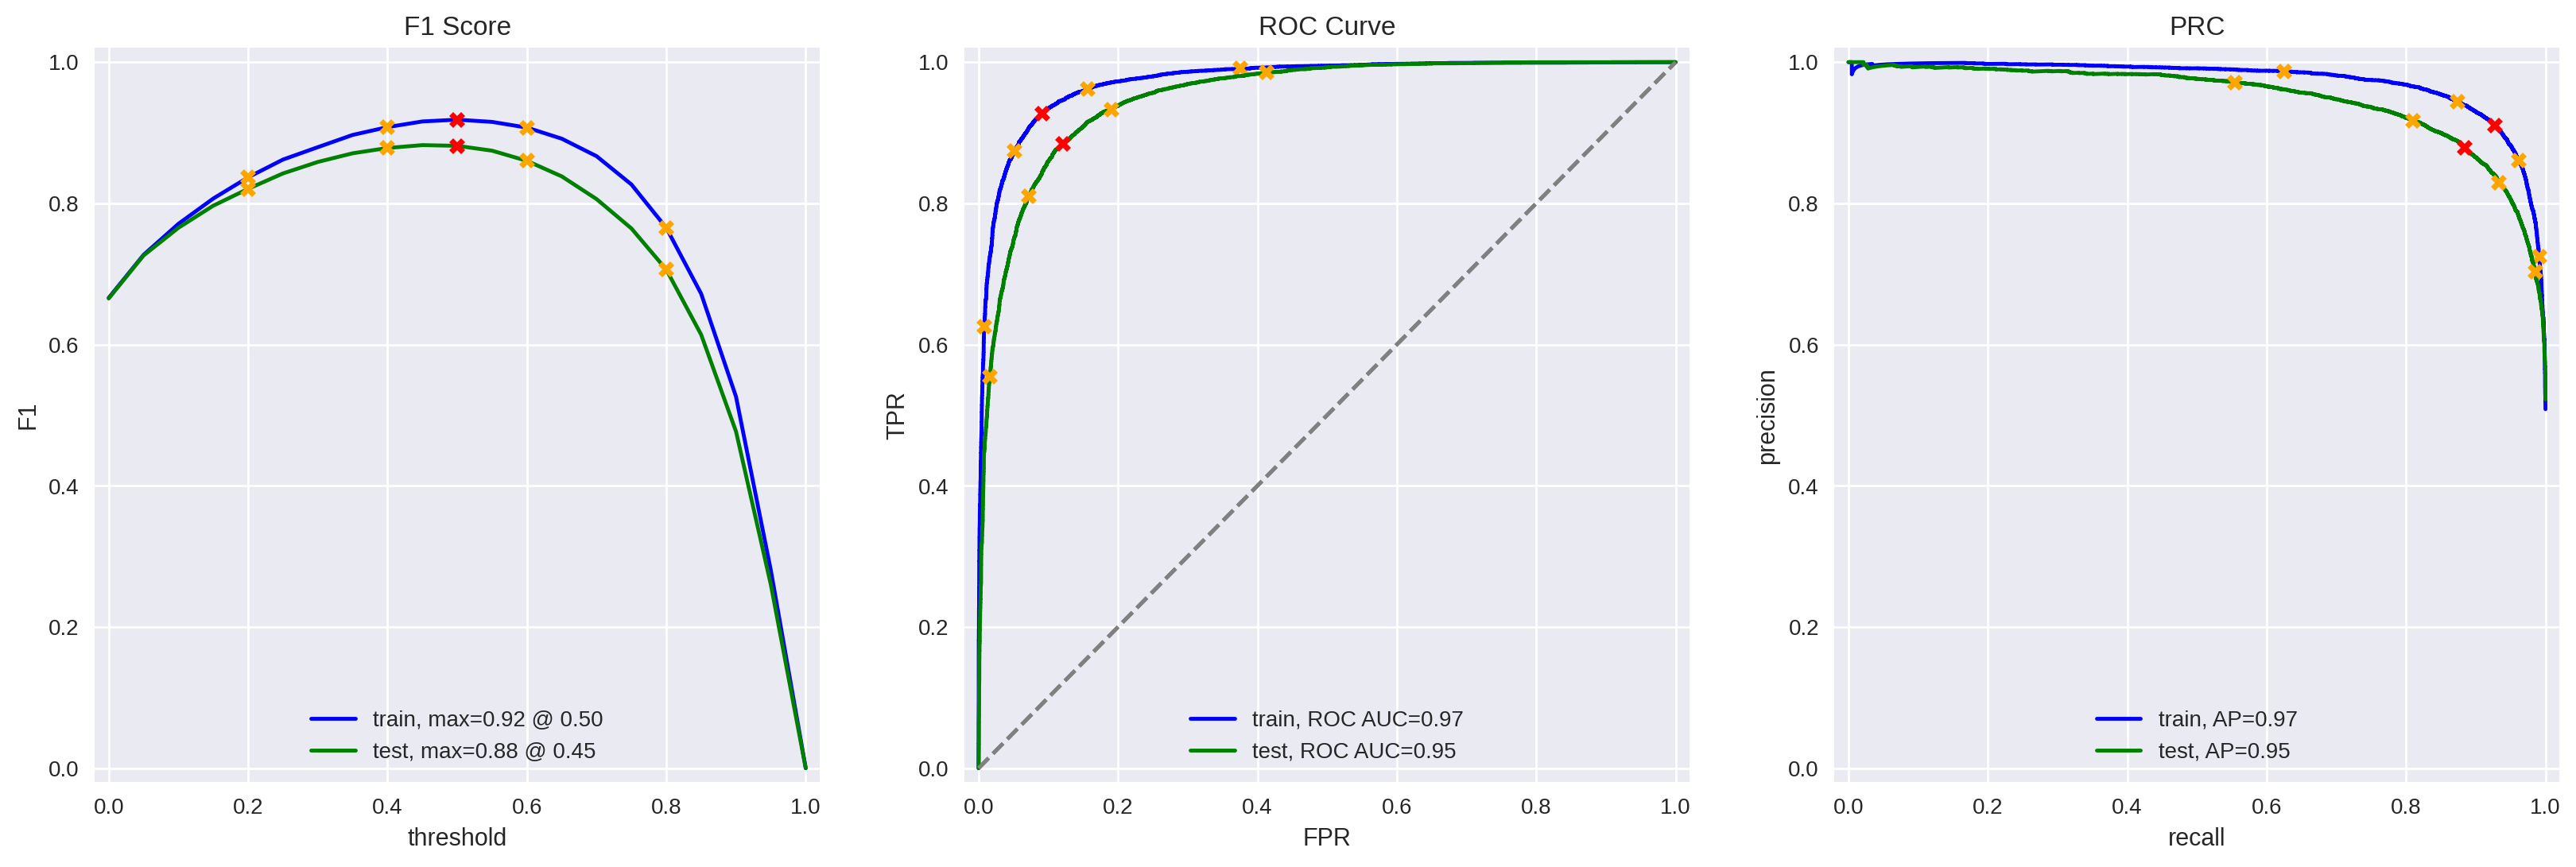

In [28]:
evaluate_model(model_1, train_features_1, train_target, test_features_1, test_target)

<div class="alert alert-info">
Accuracy: The accuracy is 0.92 on the training set and 0.88 on the test set. This indicates that the model correctly predicts the class of reviews approximately 92% of the time on the training data and 88% of the time on the test data.

F1 Score: The F1 score is 0.92 on the training set and 0.88 on the test set. The F1 score, which considers both precision and recall, indicates that the model performs well in both identifying positive and negative reviews correctly. It meets the companies standard of .85 or higher

Average Precision Score (APS): The APS is 0.97 on the training set and 0.95 on the test set. It is able to rank positive instances higher than negative ones.

ROC AUC: The ROC AUC is 0.97 on the training set and 0.95 on the test set. The model is effective at distinguishing between positive and negative reviews.
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
What can we say about its performance? 
    
</div>

### Model 3 - spaCy, TF-IDF and LR

In [29]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [30]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [31]:
df_reviews_train['review_norm_3'] = df_reviews_train['review_norm'].progress_apply(text_preprocessing_3)
df_reviews_test['review_norm_3'] = df_reviews_test['review_norm'].progress_apply(text_preprocessing_3)

  0%|          | 0/23796 [00:00<?, ?it/s]

  0%|          | 0/23533 [00:00<?, ?it/s]

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
I would apply it to the normilized data and create a new column. For instance: 
    
```python 
df_reviews_train['review_norm_3'] = df_reviews_train['review_norm'].progress_apply(text_preprocessing_3)
 
```
 
</div>

<div class="alert alert-info">
created the new column
</div>

In [32]:
train_features_3 = df_reviews_train['review_norm_3']
test_features_3 = df_reviews_test['review_norm_3']

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000)



In [33]:
# Fit and transform the training data, transform the test data
train_features_3 = vectorizer.fit_transform(train_features_3)
test_features_3 = vectorizer.transform(test_features_3)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Are you using the correct variables in the last two code lines?     
</div>

<div class="alert alert-info">
fixed variables
</div>

In [34]:
# Initialize the Logistic Regression model
model_3 = LogisticRegression(max_iter=1000)

# Train the model on the training data
model_3.fit(train_features_3, train_target)

LogisticRegression(max_iter=1000)

          train  test
Accuracy   0.91  0.88
F1         0.91  0.88
APS        0.97  0.95
ROC AUC    0.97  0.95


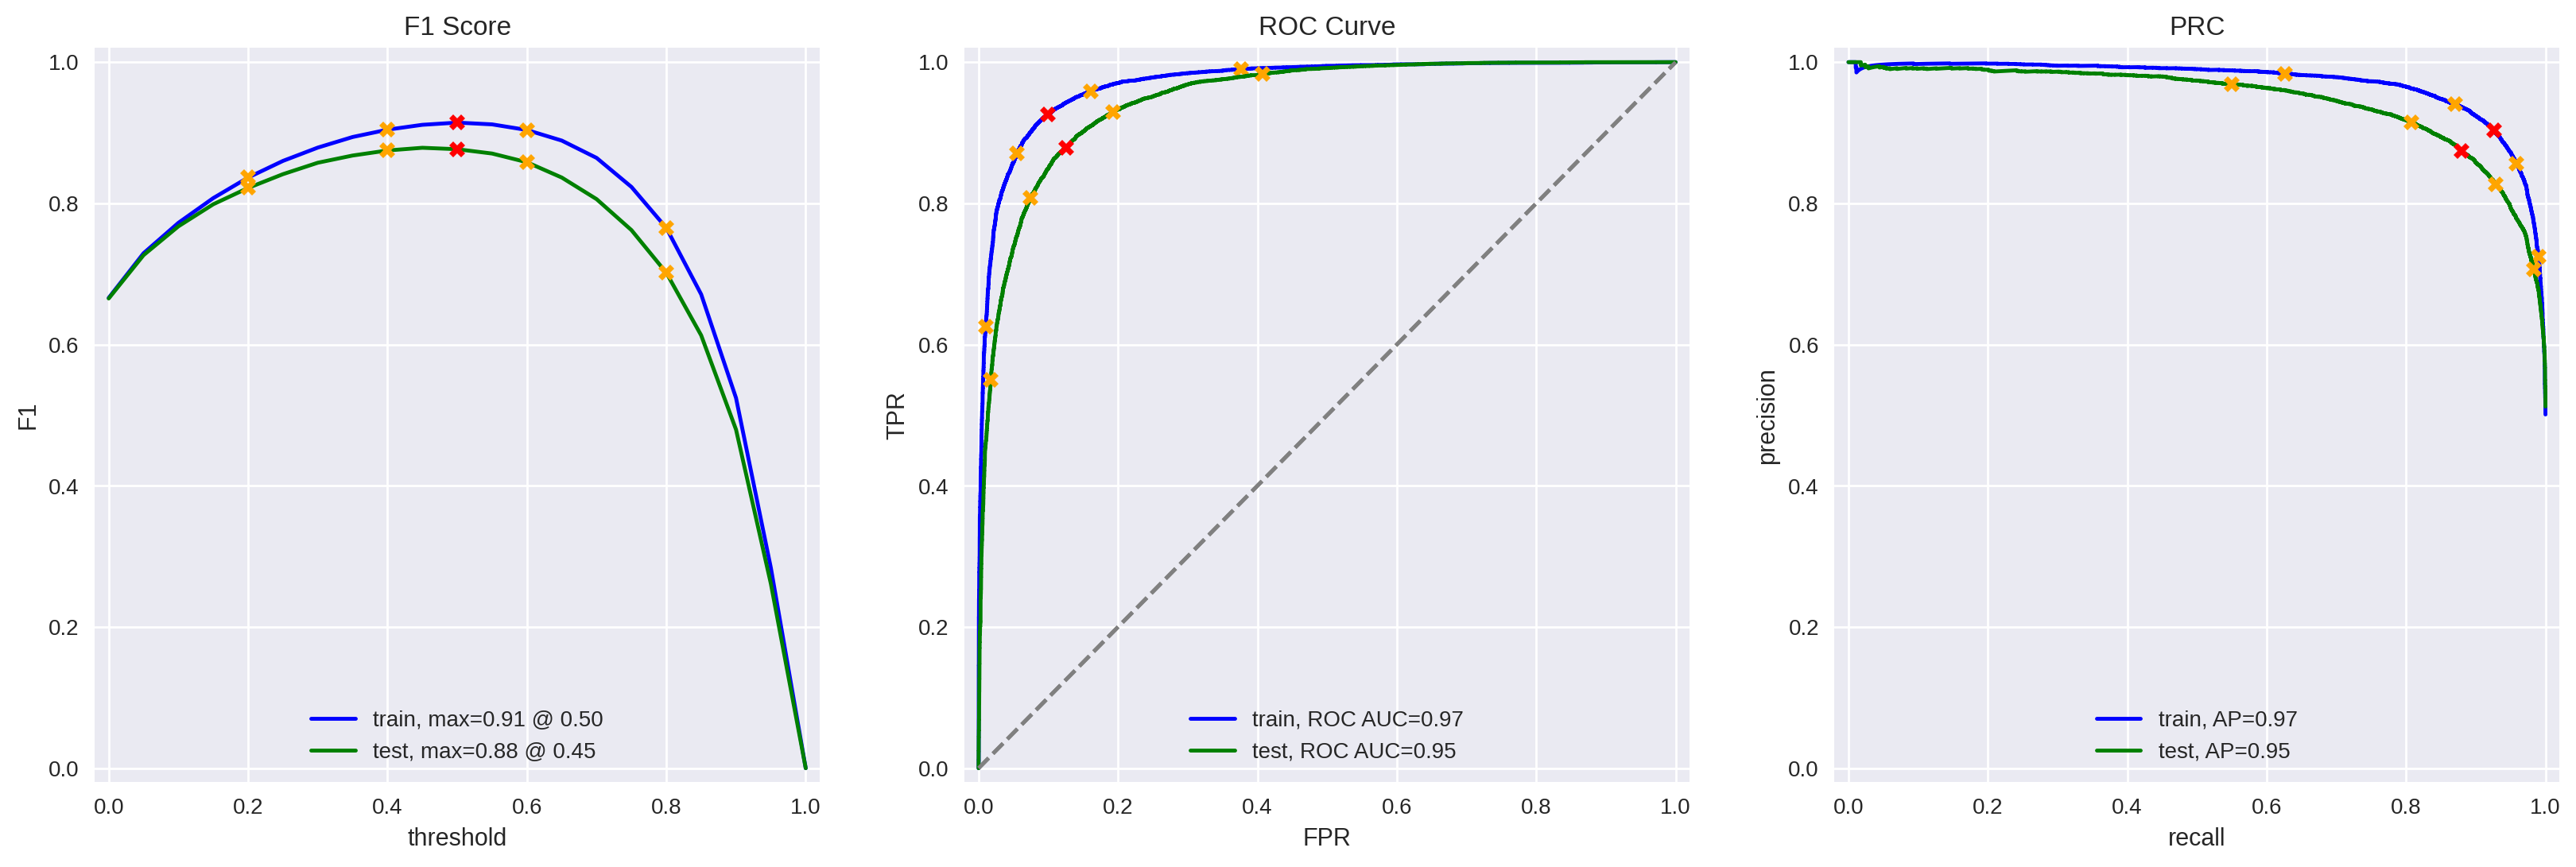

In [35]:
evaluate_model(model_3, train_features_3, train_target, test_features_3, test_target)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct.    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Please don't forget about the conclusion.     
</div>

<div class="alert alert-info">
Accuracy: The accuracy is 0.91 on the training set and 0.88 on the test set. This indicates that the model correctly predicts the class of reviews approximately 91% of the time on the training data and 88% of the time on the test data.

F1 Score: The F1 score is 0.91 on the training set and 0.88 on the test set. The model performs well in both identifying positive and negative reviews correctly. It also meets the companies standard set at .85

Average Precision Score (APS): The APS is 0.97 on the training set and 0.95 on the test set. The model is very effective at ranking positive reviews higher than negative reviews.

ROC AUC: The ROC AUC is 0.97 on the training set and 0.95 on the test set. It is effective at distinguishing between positive and negative reviews.
</div>

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [36]:
from lightgbm import LGBMClassifier

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
You do not need to repeat the code. For the previous model, you used the same code to create `train_features_3` and `test_features_3`. Since the code is the same, you can use them here. 
    
</div>

<div class="alert alert-info">
reusing train and test features 3
</div>

In [37]:
train_features_4 = train_features_3
test_features_4 = test_features_3

          train  test
Accuracy   0.91  0.86
F1         0.91  0.86
APS        0.97  0.93
ROC AUC    0.97  0.94


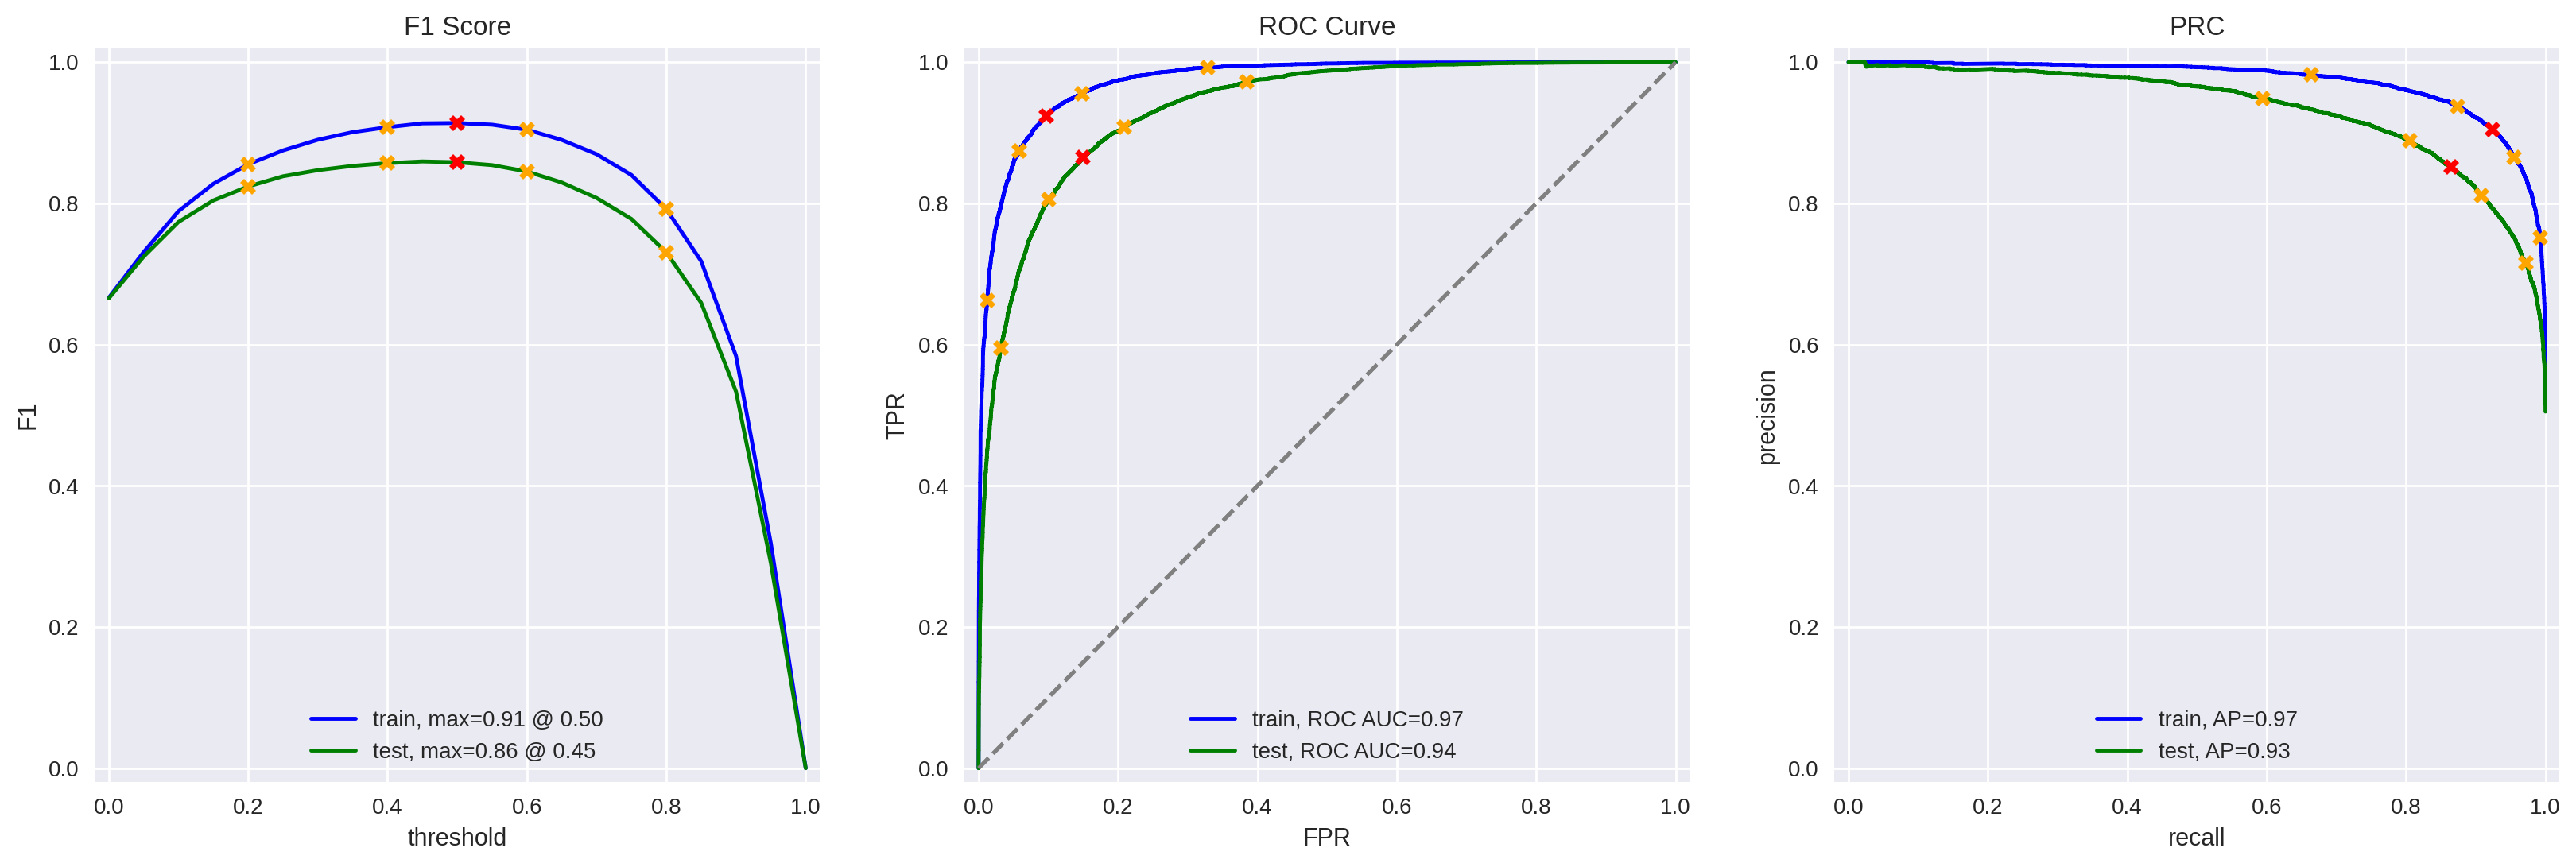

In [38]:
model_4 = LGBMClassifier()

model_4.fit(train_features_4, train_target)

evaluate_model(model_4, train_features_4, train_target, test_features_4, test_target)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
    
    
The code is correct.    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Please don't forget about the conclusion here as well.     
</div>

<div class="alert alert-info">
Accuracy: The accuracy is 0.91 on the training set and 0.86 on the test set. The model correctly predicts the class of reviews approximately 91% of the time on the training data and 86% of the time on the test data.

F1 Score: The F1 score is 0.91 on the training set and 0.86 on the test set. The model performs well in identifying both positive and negative reviews correctly. It also meets the companies standard of .85. 
    
Average Precision Score (APS): The APS is 0.97 on the training set and 0.93 on the test set. The model is effective in ranking positive reviews higher than negative ones.

ROC AUC: The ROC AUC is 0.97 on the training set and 0.94 on the test set. The model is good at distinguishing between positive and negative reviews.
</div>

For the three models that were trained, I would go with model 1. It exceeds the companies standard of a .85 f1 score and is fast at doing it. 

###  Model 9 - BERT

In [39]:
import torch
import transformers

In [40]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [41]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # text to padded ids of tokens along with their attention masks
    
    # <put your code here to create ids_list and attention_mask_list>
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Using the {device} device.')
    
    # gettings embeddings in batches

    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        # <put your code here to create attention_mask_batch
            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [42]:
# Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours
train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target.shape)

In [ ]:
# if you have got the embeddings, it's advisable to save them to have them ready if 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# and load...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct!    
</div>


## My Reviews

In [43]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples
my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])


In [44]:
my_reviews.head()

,review
0,"I did not simply like it, not my kind of movie."
1,"Well, I was bored and felt asleep in the middl..."
2,I was really fascinated with the movie
3,Even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...


In [45]:
my_reviews['review_norm'] = my_reviews['review'].apply(normalize_review)

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didn t expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...


### Model 1


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Again, you do not need to repeat the code that already exists. Instead, in the previous part, you can save these two vectorizers in different variables and use the variables here. In the current version, you create a vectorizer two times and the variable in both cases is called `vectorizer`. However, you can name the variables differently. For instance, nltk can be `vectorizer_1`(model 1 there) and the second one can be `vectorizer_3` (model 3 there). 

</div>


In [48]:
texts = my_reviews['review_norm'].apply(normalize_review)

my_reviews_pred_prob = model_1.predict_proba(vectorizer.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.60:  i did not simply like it not my kind of movie
0.78:  well i was bored and felt asleep in the middle of the movie
0.29:  i was really fascinated with the movie
0.52:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.45:  i didn t expect the reboot to be so good writers really cared about the source material
0.85:  the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.37:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.42:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    


Let's print the predictions as well.
 </div>

In [ ]:
<div class="alert alert-info">
listed predictions 
</div>

### Model 3

In [50]:
texts = my_reviews['review_norm']


my_reviews_pred_prob = model_3.predict_proba(vectorizer.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.23:  i did not simply like it not my kind of movie
0.12:  well i was bored and felt asleep in the middle of the movie
0.44:  i was really fascinated with the movie
0.06:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.19:  i didn t expect the reboot to be so good writers really cared about the source material
0.51:  the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.05:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.95:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    


- The variable `tfidf_vectorizer_3` was not created. 


- Let's print the predictions as well.
</div>

In [ ]:
<div class="alert alert-info">
listed predictions 
</div>

### Model 4

In [51]:
texts = my_reviews['review_norm']


my_reviews_pred_prob = model_4.predict_proba(vectorizer.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.60:  i did not simply like it not my kind of movie
0.43:  well i was bored and felt asleep in the middle of the movie
0.66:  i was really fascinated with the movie
0.35:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.61:  i didn t expect the reboot to be so good writers really cared about the source material
0.75:  the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.34:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.79:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    


Let's print the predictions.
</div>

<div class="alert alert-info">
listed predictions 
</div>

### Model 9

In [52]:
texts = my_reviews['review_norm']

my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

ValueError: need at least one array to concatenate

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    


Let's print the predictions  for this model.
</div>

In [ ]:
<div class="alert alert-info">
I thought the project description said I didn't have to do bert?
</div>

## Conclusions

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    


General conclusion is an important part, so please do not forget about it. 
    
</div>

<div class="alert alert-info">
In conclusion for this project, I received a dataset full of reviews from IMBD. The company asked if I could create a model with a f1 score of at least .85. Before I did that, I preprocessed the data, did an exploratory analysis on it, trained several models, and had the models predict a new set of reviews. After training the models, I thought that model_1 was the best, but after having the models predict the new set of reviews, it seemed to get more right with model_4. So I will be recommending model_4 for the company to use to predict whether or not reviews are positive or negative.
</div>

# Checklist

- [x]  Notebook was opened
- [ ]  The text data is loaded and pre-processed for vectorization
- [ ]  The text data is transformed to vectors
- [ ]  Models are trained and tested
- [ ]  The metric's threshold is reached
- [ ]  All the code cells are arranged in the order of their execution
- [ ]  All the code cells can be executed without errors
- [ ]  There are conclusions